In [1]:
# import glob     # prevent overwritting
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
pa.set_option('display.max_rows', 100)

In [ ]:
'''
총 5398 개의 init sample
6 + 56 + 1376 + 358 = 1796 -> v1 U v2


'''

var: 415
P_non: 320
sum:  415
var: 1186
D_non: 2273
sum:  1186
var: 195
PMS+E_non: 1009
sum:  195


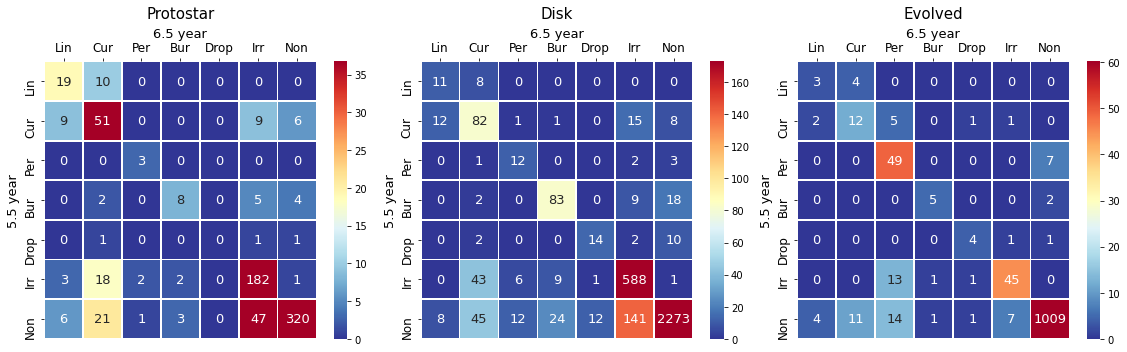

In [2]:
v0 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/wise_init_samples_3rd_4800.csv')
v1 = pa.read_csv('/home/wooseok/WISE_data/csvfiles/variable_table_combined.csv')
v2 = pa.read_csv('/home/wooseok/WISE_data/3rdnewwise/variable_table_3rd_combined_4800.csv')

v12 = pa.merge(v1,v2,how='outer',left_on='s_index',right_on='Index')

# total number of v12n = v1 var + v2 var + v1 var/v2 nonvar + v1 nonvar/v2 var
# total sample of 3rd - v12n = v1 nonvar / v2 nonvar 
v12n = v12.fillna(0)
vt = ['linear','curved','periodic','burst','drop','irregular']
for i,n in enumerate(vt):
    v12n.loc[v12n.var_type_x == n,'var_type_x'] = i+1
    v12n.loc[v12n.var_type_y == n,'var_type_y'] = i+1
    
# print('p: ',len(v12n[(v12n['class_x'] == 'P') | (v12n['class_y'] == 'P')])) # 415
# print('d: ',len(v12n[(v12n['class_x'] == 'D') | (v12n['class_y'] == 'D')])) # 1186
# print('e: ',len(v12n[(v12n['class_x'] == 'PMS+E') | (v12n['class_y'] == 'PMS+E')])) #195


cls=['P','D','PMS+E']
title_list=['Protostar','Disk','Evolved']
fig, ax = plt.subplots(1,3,figsize=(16,5))

for i in range(3):
    
    v12p = v12n[(v12n['class_x']==cls[i]) | (v12n['class_y'] == cls[i])]
    print('var:',len(v12p))
    
    #P,D,PMS+E total - variable = number of constant nonvariables
    if cls[i]=='P':
        cls_num = len(v0[v0['class'] == 'P'])-len(v12p)

        print('P_non:',cls_num)
    elif cls[i]=='D':
        cls_num = len(v0[v0['class'] == 'D'])-len(v12p)
        print('D_non:',cls_num)
    elif cls[i]=='PMS+E':
        cls_num = len(v0[v0['class'] == 'PMS+E'])-len(v12p)
        print('PMS+E_non:',cls_num)
    
    vmat = np.zeros((7,7))
    
    for k in range(7): #행, var_x
        for j in range(7): #행, var_y
            if k == 0 and j != 0 :
                vmat[6,j-1] = len(v12p[(v12p.var_type_x == k) &
                        (v12p.var_type_y == j)])
            elif j == 0 and k != 0:
                vmat[k-1,6] = len(v12p[(v12p.var_type_x == k) &
                        (v12p.var_type_y == j)])
                
            else:# i != 0 and j != 0:
                vmat[k-1,j-1] = len(v12p[(v12p.var_type_x == k) &
                        (v12p.var_type_y == j)])
                
    vmat[6,6] = cls_num # put nonvariables by hand

    print('sum: ',int(sum(sum(vmat)))-cls_num)

    sns.heatmap(vmat,ax=ax[i],annot=True,annot_kws={'size':13},fmt=".0f",vmax=0.05*sum(sum(vmat)),
                     cmap='RdYlBu_r', #RdYlBu RdYlGn
                     linewidth=0.7,).set_title(title_list[i],fontsize=15,va='bottom')

    ax[i].xaxis.tick_top()
    ax[i].xaxis.set_label_position('top') 
    ax[i].set_xticklabels(['Lin','Cur','Per','Bur','Drop','Irr','Non'],fontsize=12)

    ax[i].set_yticklabels(['Lin','Cur','Per','Bur','Drop','Irr','Non'],fontsize=12)
    ax[i].set_xlabel('6.5 year',fontsize=13)
    ax[i].set_ylabel('5.5 year',fontsize=13)
    plt.tight_layout()



#     fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/var_change_heatmap.pdf')

P: 320
[[ 19.  10.   0.   0.   0.   0.   0.]
 [  9.  51.   0.   0.   0.   9.   6.]
 [  0.   0.   3.   0.   0.   0.   0.]
 [  0.   2.   0.   8.   0.   5.   4.]
 [  0.   1.   0.   0.   0.   1.   1.]
 [  3.  18.   2.   2.   0. 182.   1.]
 [  6.  21.   1.   3.   0.  47. 320.]]
[[0.65517241 0.34482759 0.         0.         0.         0.
  0.        ]
 [0.12       0.68       0.         0.         0.         0.12
  0.08      ]
 [0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         0.10526316 0.         0.42105263 0.         0.26315789
  0.21052632]
 [0.         0.33333333 0.         0.         0.         0.33333333
  0.33333333]
 [0.01442308 0.08653846 0.00961538 0.00961538 0.         0.875
  0.00480769]
 [0.01507538 0.05276382 0.00251256 0.00753769 0.         0.11809045
  0.8040201 ]]
D: 2273
[[1.100e+01 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.200e+01 8.200e+01 1.000e+00 1.000e+00 0.000e+00 1.500e+01 8.000e+00]
 [0.000e+00 1.000e+00 1.

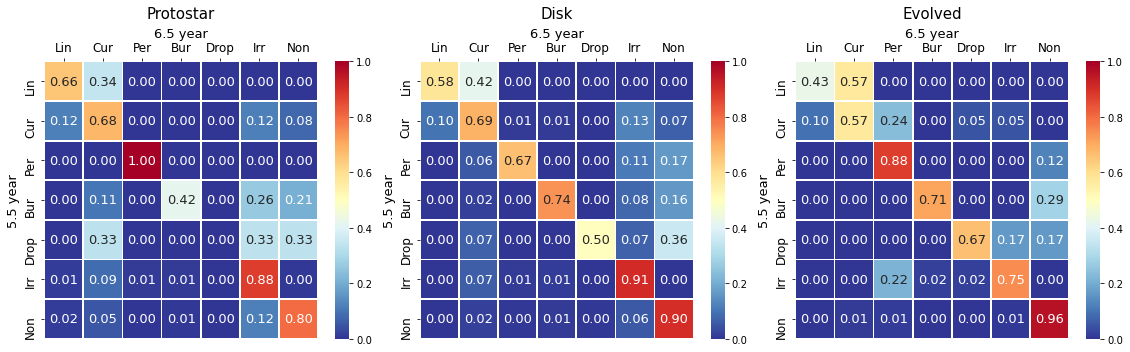

In [3]:
cls=['P','D','PMS+E']
title_list=['Protostar','Disk','Evolved']
fig, ax = plt.subplots(1,3,figsize=(16,5))

for i in range(3):
    
    v12p = v12n[(v12n['class_x']==cls[i]) | (v12n['class_y'] == cls[i])]

    #P,D,PMS+E total - variable = number of constant nonvariables
    if cls[i]=='P':
        cls_num = len(v0[v0['class'] == 'P'])-len(v12n[(v12n['class_x'] == 'P') | (v12n['class_y'] == 'P')])

        print('P:',cls_num)
    elif cls[i]=='D':
        cls_num = len(v0[v0['class'] == 'D'])-len(v12n[(v12n['class_x'] == 'D') | (v12n['class_y'] == 'D')])
        print('D:',cls_num)
    elif cls[i]=='PMS+E':
        cls_num = len(v0[v0['class'] == 'PMS+E'])-len(v12n[(v12n['class_x'] == 'PMS+E') | (v12n['class_y'] == 'PMS+E')])
        print('PMS+E:',cls_num)

    vmat = np.zeros((7,7))
    for k in range(7): #행, var_x
        for j in range(7): #행, var_y
            if k == 0 and j != 0 :
                vmat[6,j-1] = len(v12p[(v12p.var_type_x == k) &
                        (v12p.var_type_y == j)])
            elif j == 0 and k != 0:
                vmat[k-1,6] = len(v12p[(v12p.var_type_x == k) &
                        (v12p.var_type_y == j)])
                
            else:# i != 0 and j != 0:
                vmat[k-1,j-1] = len(v12p[(v12p.var_type_x == k) &
                        (v12p.var_type_y == j)])
                
    vmat[6,6] = cls_num # put nonvariables by hand
    
    print(vmat)
    for l in range(7):
        vmat[l,:] = vmat[l,:]/sum(vmat[l,:])
    print(vmat)
    

    sns.heatmap(vmat,ax=ax[i],annot=True,annot_kws={'size':13},fmt=".2f",vmax=1,
                     cmap='RdYlBu_r', #RdYlBu RdYlGn
                     linewidth=0.7,).set_title(title_list[i],fontsize=15,va='bottom')
    ax[i].xaxis.tick_top()
    ax[i].xaxis.set_label_position('top') 
    ax[i].set_xticklabels(['Lin','Cur','Per','Bur','Drop','Irr','Non'],fontsize=12)

    ax[i].set_yticklabels(['Lin','Cur','Per','Bur','Drop','Irr','Non'],fontsize=12)
    ax[i].set_xlabel('6.5 year',fontsize=13)
    ax[i].set_ylabel('5.5 year',fontsize=13)
    plt.tight_layout()


#     fig.savefig('/home/wooseok/WISE_data/ws_paper/WISE_figures/var_change_heatmap_frac.pdf')
